In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_1 = 'data/resale-flat-prices-based-on-approval-date-1990-1999.csv'
data_2 = 'data/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv'
data_3 = 'data/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv'
data_4 = 'data/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv'
data_5 = 'data/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'

In [3]:
def readCSV(file_path):
    df = pd.read_csv(file_path)
    return df

In [4]:
df1 = readCSV(data_1)

In [5]:
df2 = readCSV(data_2)

In [6]:
df3 = readCSV(data_3)

In [7]:
df4 = readCSV(data_4)

In [8]:
df5 = readCSV(data_5)

In [9]:
### Drop remaining_lease in df4 and df5
df4 = df4.drop(columns=['remaining_lease'])
df5 = df5.drop(columns=['remaining_lease'])

In [10]:
### Merge every df
df_list = [df1,df2,df3,df4,df5]
merged_df = pd.concat(df_list)

In [11]:
merged_df['month'] =  pd.to_datetime(merged_df['month'], format='%Y-%m').dt.to_period('m')
merged_df['flat_model'] = merged_df['flat_model'].str.upper()
merged_df['town'] = merged_df['town'].str.upper()
merged_df['flat_type'] = merged_df['flat_type'].str.upper()
merged_df['flat_type'] = merged_df['flat_type'].str.replace('-',' ')

In [12]:
merged_df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [13]:
merged_df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [14]:
merged_df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [15]:
merged_df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

In [16]:
#### Check empty data
merged_df.isna().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
resale_price           False
dtype: bool

In [17]:
merged_df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0
5,1990-01,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,46000.0
6,1990-01,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,07 TO 09,67.0,NEW GENERATION,1977,42000.0
7,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,10 TO 12,67.0,NEW GENERATION,1977,38000.0
8,1990-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,04 TO 06,67.0,NEW GENERATION,1977,40000.0
9,1990-01,ANG MO KIO,3 ROOM,232,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,47000.0


## Drop unwanted data

In [18]:
new_merged_df = merged_df.drop(columns=['block','street_name','storey_range','lease_commence_date'])

## Convert categorical to numerical

In [19]:
converted_df = merged_df.copy()

In [20]:
# Nominal to numerical
conversion = ['flat_model','town','flat_type']

In [21]:
converted_df[conversion] = new_merged_df[conversion].astype('category')
converted_df.dtypes

month                  period[M]
town                    category
flat_type               category
block                     object
street_name               object
storey_range              object
floor_area_sqm           float64
flat_model              category
lease_commence_date        int64
resale_price             float64
dtype: object

In [22]:
converted_df["town_cat"] = converted_df["town"].cat.codes
converted_df["flat_type_cat"] = converted_df["flat_type"].cat.codes
converted_df["flat_model_cat"] = converted_df["flat_model"].cat.codes

In [23]:
converted_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,town_cat,flat_type_cat,flat_model_cat
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,0,0,5
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,0,0,5
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,0,0,5
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,0,0,5
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,0,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147905,2023-03,YISHUN,3 ROOM,270,YISHUN ST 22,10 TO 12,74.0,MODEL A,1987,350000.0,26,2,8
147906,2023-03,YISHUN,4 ROOM,236,YISHUN RING RD,01 TO 03,93.0,NEW GENERATION,1985,450000.0,26,3,12
147907,2023-03,YISHUN,4 ROOM,279,YISHUN ST 22,07 TO 09,84.0,SIMPLIFIED,1985,390000.0,26,3,16
147908,2023-03,YISHUN,4 ROOM,513C,YISHUN ST 51,07 TO 09,93.0,MODEL A,2018,550000.0,26,3,8


In [24]:
converted_df.dtypes

month                  period[M]
town                    category
flat_type               category
block                     object
street_name               object
storey_range              object
floor_area_sqm           float64
flat_model              category
lease_commence_date        int64
resale_price             float64
town_cat                    int8
flat_type_cat               int8
flat_model_cat              int8
dtype: object

### EDA

C:\Users\mapro\AppData\Local\Temp\ipykernel_33152\1946478538.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = converted_df.corr()


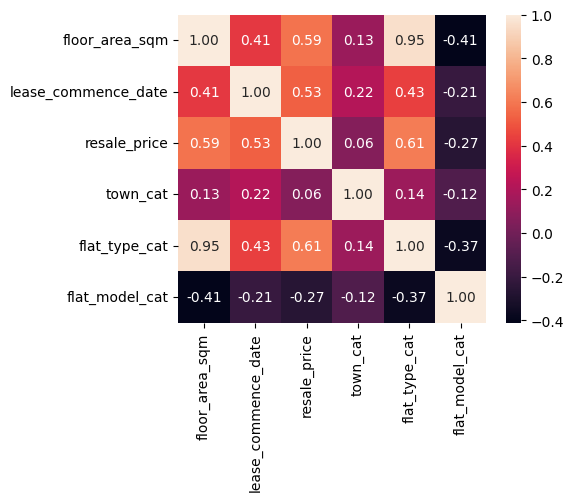

In [27]:

corr = converted_df.corr()
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, vmax=1, square=True, annot=True, fmt=".2f");

Based on the correlation of each variables, it can be said that resale price of a HDB flat has particularly very insignficant positive correlation with the location of the HDB flat <br>
Resale prices are largely correlated to to the floor area of the unit, lease commercement date and its' flat type. One should take note that HDB Flat type are largely tied to the floor area of the HDB flat. Ie, 2-room flat unit will have a smaller SQM than 3-room, 4-room, 5-room, etc.

In [28]:
cols = ['resale_price','floor_area_sqm','lease_commence_date','flat_type_cat']

In [29]:
df_1 = converted_df[cols]

In [30]:
df_1

,resale_price,floor_area_sqm,lease_commence_date,flat_type_cat
0,9000.0,31.0,1977,0
1,6000.0,31.0,1977,0
2,8000.0,31.0,1977,0
3,6000.0,31.0,1977,0
4,47200.0,73.0,1976,2
...,...,...,...,...
147905,350000.0,74.0,1987,2
147906,450000.0,93.0,1985,3
147907,390000.0,84.0,1985,3
147908,550000.0,93.0,2018,3


In [31]:
converted_df['flat_type'].unique()

['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', 'MULTI GENERATION']
Categories (7, object): ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI GENERATION']

#### Plot scatter graph

sns.lmplot(data=df_1, y="resale_price", x="lease_commence_date", hue="flat_type_cat")

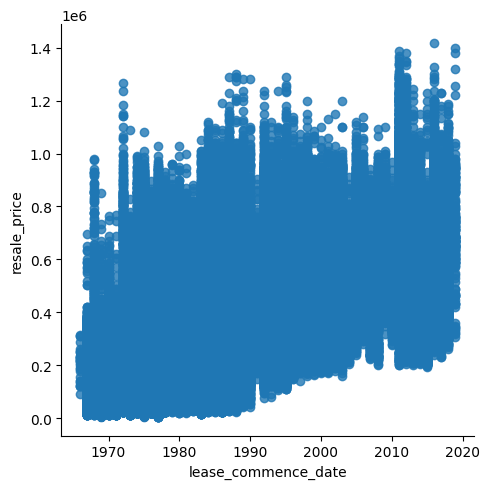

In [32]:
sns.lmplot(data=df_1, y="resale_price", x="lease_commence_date")

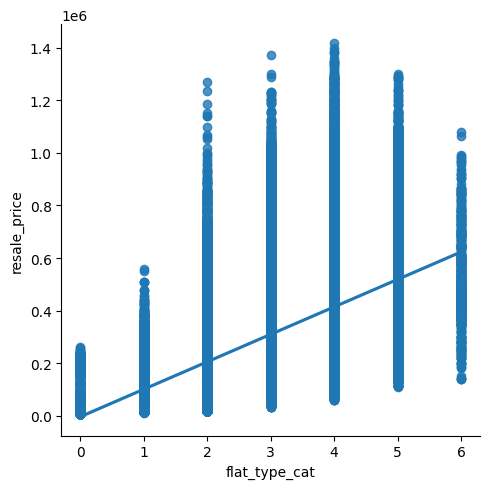

In [33]:
sns.lmplot(data=df_1, y="resale_price", x="flat_type_cat")

Based on the graph, prices increases exponentially as the flat type category increases. <br>
Cat 0 = 1 ROOM, CAT 1 = 2 ROOM, CAT 2 = 3 ROOM, CAT 3 = 4 ROOM, CAT 4 = 5 ROOM, CAT 5 = EXEC, CAT 6 = MULTI-GEN

In [45]:
converted_df[converted_df['flat_type_cat'] == 5]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,town_cat,flat_type_cat,flat_model_cat
333,1990-01,BEDOK,EXECUTIVE,716,BEDOK RESERVOIR RD,07 TO 09,143.0,APARTMENT,1984,200000.0,1,5,3
334,1990-01,BEDOK,EXECUTIVE,725,BEDOK RESERVOIR RD,01 TO 03,151.0,MAISONETTE,1984,195000.0,1,5,7
394,1990-01,BUKIT BATOK,EXECUTIVE,223,BT BATOK EAST AVE 3,10 TO 12,141.0,APARTMENT,1985,182000.0,3,5,3
395,1990-01,BUKIT BATOK,EXECUTIVE,223,BT BATOK EAST AVE 3,07 TO 09,146.0,APARTMENT,1985,183000.0,3,5,3
396,1990-01,BUKIT BATOK,EXECUTIVE,221,BT BATOK EAST AVE 3,07 TO 09,141.0,APARTMENT,1985,210000.0,3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147821,2023-03,BEDOK,EXECUTIVE,115,BEDOK RESERVOIR RD,04 TO 06,156.0,MAISONETTE,1985,850000.0,1,5,7
147837,2023-03,CHOA CHU KANG,EXECUTIVE,273,CHOA CHU KANG AVE 2,01 TO 03,143.0,APARTMENT,1993,650000.0,8,5,3
147838,2023-03,CHOA CHU KANG,EXECUTIVE,448,CHOA CHU KANG AVE 4,13 TO 15,143.0,MAISONETTE,1997,790000.0,8,5,7
147848,2023-03,HOUGANG,EXECUTIVE,132,LOR AH SOO,04 TO 06,151.0,MAISONETTE,1984,840000.0,11,5,7


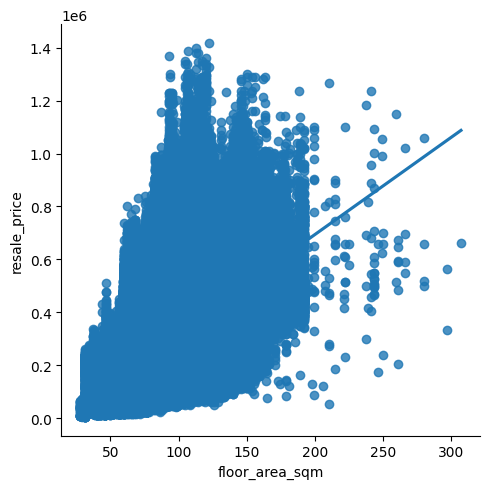

In [34]:
sns.lmplot(data=df_1, y="resale_price", x="floor_area_sqm")

#### Check outlier

<AxesSubplot: xlabel='resale_price'>

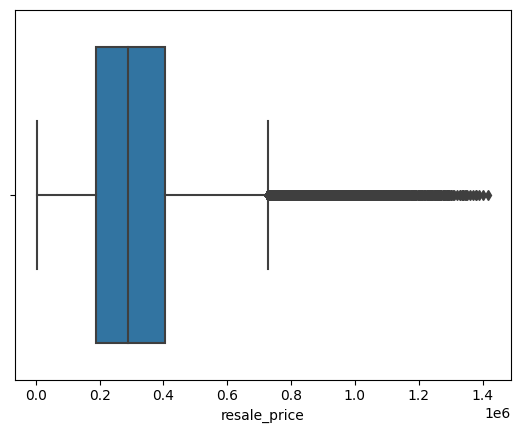

In [35]:
sns.boxplot(x=df_1["resale_price"])

<AxesSubplot: xlabel='lease_commence_date'>

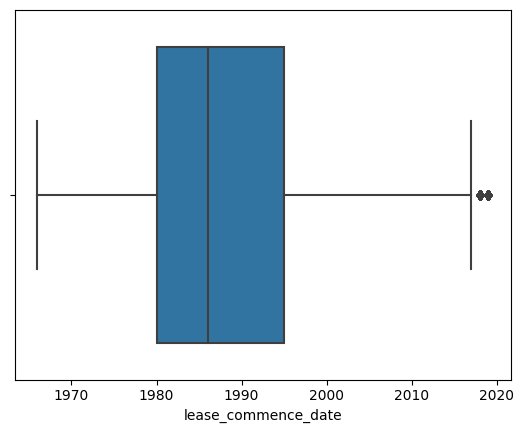

In [36]:
sns.boxplot(x=df_1["lease_commence_date"])

<AxesSubplot: xlabel='floor_area_sqm'>

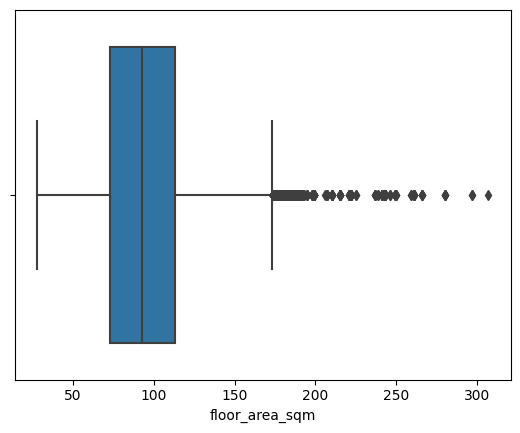

In [37]:
sns.boxplot(x=df_1["floor_area_sqm"])

<AxesSubplot: xlabel='flat_type_cat'>

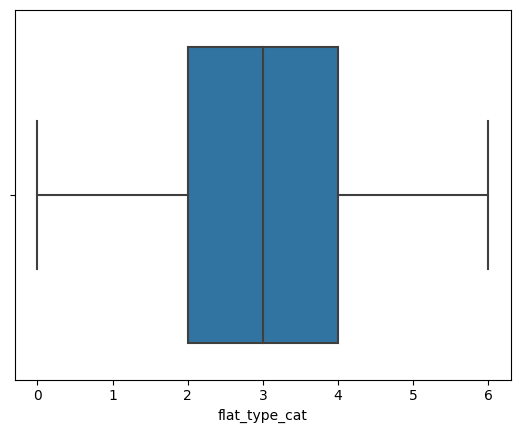

In [38]:
sns.boxplot(x=df_1['flat_type_cat'])

### Plotting time-series graph

Strategy:
1. Avg resale price by flat type and month
2. Avg resale price by lease commence date and month
3. Avg resale price by town and month
4. Count by no of transaction by month and show avg trasaction price

FYI, 
1. Story range is not standarized data, too much variation between data
2. Flat model is too diversed, cannot be used as feature due to low correlation

In [25]:
converted_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,town_cat,flat_type_cat,flat_model_cat
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,0,0,5
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,0,0,5
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,0,0,5
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,0,0,5
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,0,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147905,2023-03,YISHUN,3 ROOM,270,YISHUN ST 22,10 TO 12,74.0,MODEL A,1987,350000.0,26,2,8
147906,2023-03,YISHUN,4 ROOM,236,YISHUN RING RD,01 TO 03,93.0,NEW GENERATION,1985,450000.0,26,3,12
147907,2023-03,YISHUN,4 ROOM,279,YISHUN ST 22,07 TO 09,84.0,SIMPLIFIED,1985,390000.0,26,3,16
147908,2023-03,YISHUN,4 ROOM,513C,YISHUN ST 51,07 TO 09,93.0,MODEL A,2018,550000.0,26,3,8


### Standardization and Normalization

#### Standardization

In [47]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
s_scaled = s_scaler.fit_transform(df_1)
#Convert to table format - StandardScaler 
scaled_df = pd.DataFrame(data=s_scaled, columns=['resale_price', 'floor_area_sqm', 'lease_commence_date','flat_type_cat'])

#### Normalization (Min-Max)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaler.fit(converted_df)
mm_scaled = mm_scaler.transform(converted_df)
#Convert to table format - MinMaxScaler
mm_df = pd.DataFrame(data=mm_scaled, columns=['floor_area_sqm','town_cat', 'flat_type_cat', 'flat_model_cat','resale_price'])

### Training using DecisionTree

In [ ]:
#### Train-test split

In [48]:
from sklearn.model_selection import train_test_split
X = scaled_df[['floor_area_sqm', 'lease_commence_date','flat_type_cat']]
y = scaled_df[['resale_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X = scaled_df[['floor_area_sqm','town_cat', 'flat_type_cat', 'flat_model_cat']]
y = scaled_df[['resale_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
from sklearn import tree
dt5 = tree.DecisionTreeRegressor(max_depth=100)
dt5.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=100)

In [50]:
y_pred = dt5.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error  
# Calculation of Mean Squared Error (MSE)  
mean_squared_error(y_test,y_pred,squared=False)  

0.656485933778073

In [52]:
y_test_arr = y_test.to_numpy()

In [59]:
def checkOriginalandPred(y_test,y_pred,num):
    orig = y_test[num]
    pred = y_pred[num]
    print(orig, pred)
checkOriginalandPred(y_test_arr,y_pred,num=1500)

[0.54771254] -0.03218318935618713


In [54]:
# for inverse transformation
inversed = s_scaler.inverse_transform(s_scaled)
print(inversed)

[[9.000e+03 3.100e+01 1.977e+03 0.000e+00]
 [6.000e+03 3.100e+01 1.977e+03 0.000e+00]
 [8.000e+03 3.100e+01 1.977e+03 0.000e+00]
 ...
 [3.900e+05 8.400e+01 1.985e+03 3.000e+00]
 [5.500e+05 9.300e+01 2.018e+03 3.000e+00]
 [6.500e+05 1.220e+02 1.988e+03 4.000e+00]]


### Training using SVR

In [60]:
from sklearn import svm
svr = svm.SVR()

In [61]:
from sklearn.model_selection import train_test_split
X = scaled_df[['floor_area_sqm', 'lease_commence_date','flat_type_cat']]
y = scaled_df[['resale_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
svr_fitted = svr.fit(X_train, y_train)

In [ ]:
y_pred = svr_fitted.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error  
# Calculation of Mean Squared Error (MSE)  
mean_squared_error(y_test,y_pred,squared=False)  

### Test